In [1]:
pip install datasets

In [1]:
from datasets import load_dataset


RFSD = load_dataset('irlspbru/RFSD', split='train', streaming=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [12]:
import pandas as pd

records = []
for i, record in enumerate(RFSD):
    if i >= 1000:
        break
    records.append(record)

# Преобразование в pandas DataFrame
df = pd.DataFrame(records)

# Проверка результата
print(f"Размер датасета: {df.shape}")
print(df.head())

Размер датасета: (1000, 213)
          inn           ogrn region region_taxcode creation_date  \
0  0100000036  1020100002394   None           None    1990-12-10   
1  0100000090  1110105000686   None           None    1992-10-06   
2  0100000237  1120105002720   None           None    1994-03-01   
3  0100000244  1090105000150   None           None    1994-06-20   
4  0100000251  1170105000152   None           None    1994-05-25   

  dissolution_date   age  eligible exemption_criteria  financial  ...  \
0       2023-04-04  21.0       1.0               none        0.0  ...   
1       2011-02-10  19.0       1.0               none        0.0  ...   
2       2012-11-23  17.0       1.0               none        0.0  ...   
3       2013-01-14  17.0       1.0               none        0.0  ...   
4       2017-01-26  17.0       1.0               none        0.0  ...   

   line_6320  line_6321  line_6322  line_6323  line_6324  line_6325 line_6326  \
0       None       None       None       N

In [15]:
# Оставляем только первые 20 столбцов (если столбцов больше 20)
if len(df.columns) > 20:
    df = df.iloc[:, :20]
print(f"Размер датасета после отбора столбцов: {df.shape}")
print(df.head())

Размер датасета после отбора столбцов: (1000, 20)
          inn           ogrn region region_taxcode creation_date  \
0  0100000036  1020100002394   None           None    1990-12-10   
1  0100000090  1110105000686   None           None    1992-10-06   
2  0100000237  1120105002720   None           None    1994-03-01   
3  0100000244  1090105000150   None           None    1994-06-20   
4  0100000251  1170105000152   None           None    1994-05-25   

  dissolution_date   age  eligible exemption_criteria  financial  filed  \
0       2023-04-04  21.0       1.0               none        0.0    0.0   
1       2011-02-10  19.0       1.0               none        0.0    0.0   
2       2012-11-23  17.0       1.0               none        0.0    0.0   
3       2013-01-14  17.0       1.0               none        0.0    0.0   
4       2017-01-26  17.0       1.0               none        0.0    0.0   

   imputed  simplified  articulated  totals_adjustment  outlier  okved  \
0      0.0      

In [16]:
# Вывод описательной статистики для DataFrame
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ДЛЯ ДАТАСЕТА:")
print("=" * 50)

# Основная статистика для числовых столбцов
print("\n1. ОСНОВНАЯ СТАТИСТИКА (числовые столбцы):")
print(df.describe())

# Информация о типах данных и пропущенных значениях
print("\n2. ИНФОРМАЦИЯ О ДАННЫХ:")
print(df.info())

# Статистика для категориальных/строковых столбцов
print("\n3. СТАТИСТИКА ДЛЯ КАТЕГОРИАЛЬНЫХ ДАННЫХ:")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\nСтолбец: {col}")
        print(f"Количество уникальных значений: {df[col].nunique()}")
        print(f"Наиболее частые значения:")
        print(df[col].value_counts().head())
else:
    print("Категориальные столбцы не обнаружены")

# Проверка на пропущенные значения
print("\n4. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("Пропущенные значения отсутствуют")

# Основные статистики для каждого столбца
print("\n5. СТАТИСТИКА ПО СТОЛБЦАМ:")
for col in df.columns:
    print(f"\nСтолбец: {col}")
    print(f"Тип данных: {df[col].dtype}")
    if df[col].dtype in ['int64', 'float64']:
        print(f"Минимум: {df[col].min()}")
        print(f"Максимум: {df[col].max()}")
        print(f"Среднее: {df[col].mean()}")
        print(f"Медиана: {df[col].median()}")
        print(f"Стандартное отклонение: {df[col].std()}")

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ДЛЯ ДАТАСЕТА:

1. ОСНОВНАЯ СТАТИСТИКА (числовые столбцы):
              age     eligible  financial   filed      imputed  simplified  \
count  1000.00000  1000.000000     1000.0  1000.0  1000.000000  342.000000   
mean      6.64200     0.994000        0.0     0.0     0.342000    0.847953   
std       4.81633     0.077266        0.0     0.0     0.474617    0.359592   
min       0.00000     0.000000        0.0     0.0     0.000000    0.000000   
25%       3.00000     1.000000        0.0     0.0     0.000000    1.000000   
50%       5.00000     1.000000        0.0     0.0     0.000000    1.000000   
75%      10.00000     1.000000        0.0     0.0     1.000000    1.000000   
max      26.00000     1.000000        0.0     0.0     1.000000    1.000000   

       articulated  totals_adjustment  outlier  
count   342.000000         342.000000   1000.0  
mean      0.947368           0.935673      0.0  
std       0.223624           0.245695      0.0  
min       0.000000 

Построение гистограмм

Доступные колонки в DataFrame:
['inn', 'ogrn', 'region', 'region_taxcode', 'creation_date', 'dissolution_date', 'age', 'eligible', 'exemption_criteria', 'financial', 'filed', 'imputed', 'simplified', 'articulated', 'totals_adjustment', 'outlier', 'okved', 'okved_section', 'okpo', 'okopf']

Анализ выбросов для 'age':
  - Количество выбросов: 2
  - Нижняя граница: -7.50
  - Верхняя граница: 20.50
  - Минимальное значение выброса: 21.00
  - Максимальное значение выброса: 26.00

Анализ выбросов для 'eligible':
  - Количество выбросов: 6
  - Нижняя граница: 1.00
  - Верхняя граница: 1.00
  - Минимальное значение выброса: 0.00
  - Максимальное значение выброса: 0.00

Анализ выбросов для 'simplified':
  - Количество выбросов: 52
  - Нижняя граница: 1.00
  - Верхняя граница: 1.00
  - Минимальное значение выброса: 0.00
  - Максимальное значение выброса: 0.00


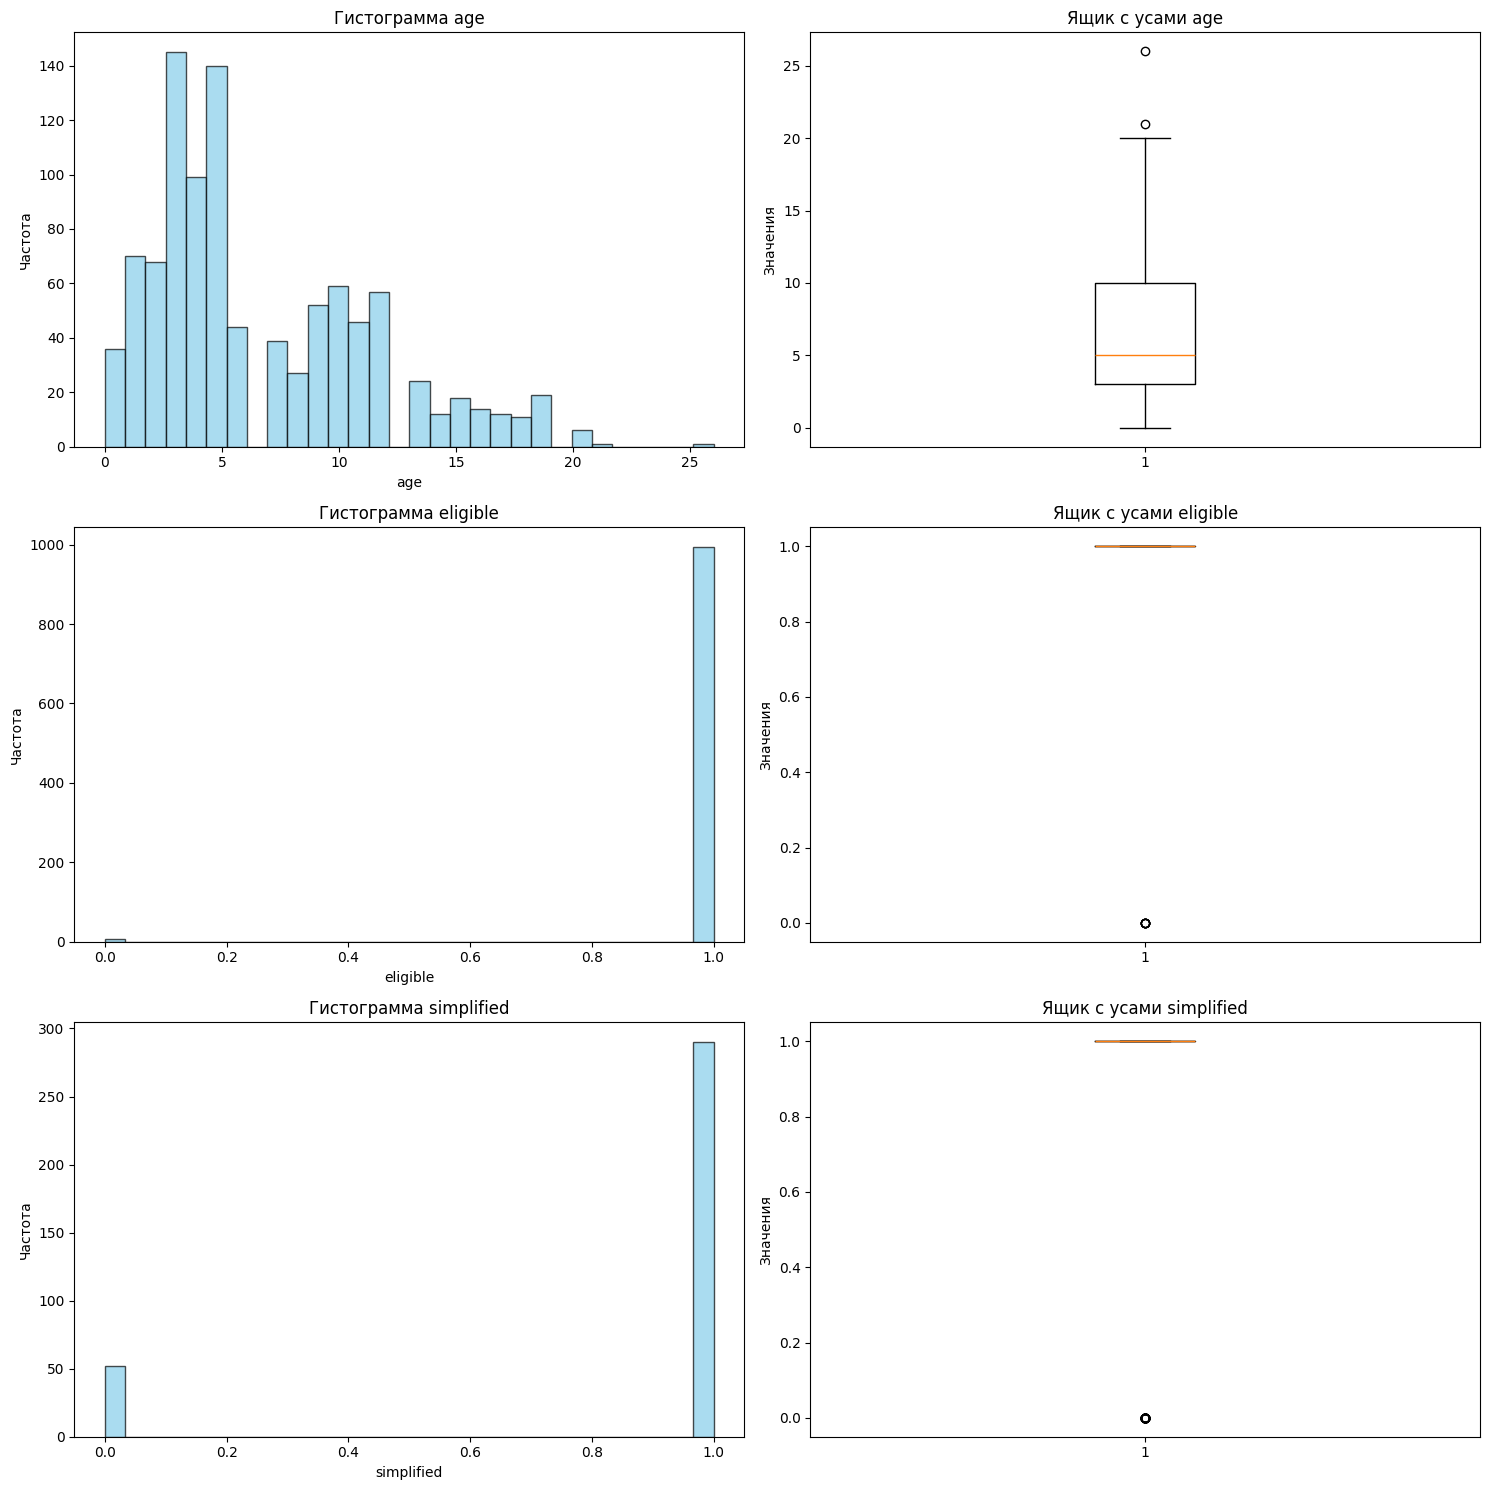


ДЕТАЛЬНЫЙ АНАЛИЗ ЧИСЛОВЫХ ПЕРЕМЕННЫХ:

age:
  - Минимум: 0.0
  - Максимум: 26.0
  - Среднее: 6.64
  - Медиана: 5.0
  - Стандартное отклонение: 4.82

eligible:
  - Минимум: 0.0
  - Максимум: 1.0
  - Среднее: 0.99
  - Медиана: 1.0
  - Стандартное отклонение: 0.08

simplified:
  - Минимум: 0.0
  - Максимум: 1.0
  - Среднее: 0.85
  - Медиана: 1.0
  - Стандартное отклонение: 0.36


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Проверим, существуют ли указанные колонки в DataFrame
available_columns = df.columns.tolist()
print("Доступные колонки в DataFrame:")
print(available_columns)

# Выберем колонки для анализа (если они существуют)
columns_to_analyze = []
for col in ['age', 'eligible', 'simplified']:
    if col in df.columns:
        columns_to_analyze.append(col)
    else:
        print(f"Колонка '{col}' не найдена в DataFrame")

if not columns_to_analyze:
    print("Ни одна из указанных колонок не найдена в DataFrame")
else:
    # Создаем графики
    fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=2, figsize=(15, 5*len(columns_to_analyze)))

    for i, col in enumerate(columns_to_analyze):
        # Проверяем тип данных колонки
        if df[col].dtype in ['int64', 'float64']:
            # Гистограмма
            axes[i, 0].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i, 0].set_title(f'Гистограмма {col}')
            axes[i, 0].set_xlabel(col)
            axes[i, 0].set_ylabel('Частота')

            # Ящик с усами для выявления выбросов
            axes[i, 1].boxplot(df[col].dropna())
            axes[i, 1].set_title(f'Ящик с усами {col}')
            axes[i, 1].set_ylabel('Значения')

            # Анализ выбросов
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"\nАнализ выбросов для '{col}':")
            print(f"  - Количество выбросов: {len(outliers)}")
            print(f"  - Нижняя граница: {lower_bound:.2f}")
            print(f"  - Верхняя граница: {upper_bound:.2f}")

            if len(outliers) > 0:
                print(f"  - Минимальное значение выброса: {outliers[col].min():.2f}")
                print(f"  - Максимальное значение выброса: {outliers[col].max():.2f}")

        else:
            # Для категориальных данных строим bar plot
            value_counts = df[col].value_counts()
            axes[i, 0].bar(value_counts.index.astype(str), value_counts.values, alpha=0.7, color='lightgreen')
            axes[i, 0].set_title(f'Распределение {col}')
            axes[i, 0].set_xlabel(col)
            axes[i, 0].set_ylabel('Частота')
            axes[i, 0].tick_params(axis='x', rotation=45)

            # Вторая панель оставляем пустой для категориальных данных
            axes[i, 1].axis('off')

            print(f"\nАнализ категориальной переменной '{col}':")
            print(f"  - Количество уникальных значений: {df[col].nunique()}")
            print(f"  - Наиболее частые значения:")
            for val, count in value_counts.head().items():
                print(f"    {val}: {count}")

    plt.tight_layout()
    plt.show()

# Дополнительный анализ для числовых колонок
numeric_cols = [col for col in columns_to_analyze if col in df.columns and df[col].dtype in ['int64', 'float64']]
if numeric_cols:
    print("\nДЕТАЛЬНЫЙ АНАЛИЗ ЧИСЛОВЫХ ПЕРЕМЕННЫХ:")
    for col in numeric_cols:
        print(f"\n{col}:")
        print(f"  - Минимум: {df[col].min()}")
        print(f"  - Максимум: {df[col].max()}")
        print(f"  - Среднее: {df[col].mean():.2f}")
        print(f"  - Медиана: {df[col].median()}")
        print(f"  - Стандартное отклонение: {df[col].std():.2f}")

        # Проверка на аномальные значения
        if col == 'age':
            # Для возраста проверяем разумные пределы
            anomalous_age = df[(df[col] < 0) | (df[col] > 120)]
            if len(anomalous_age) > 0:
                print(f"  - Обнаружены аномальные значения возраста: {len(anomalous_age)} записей")
                print(f"    Аномальные значения: {anomalous_age[col].unique()}")

Матрицы корреляции

Колонки из изображения, присутствующие в DataFrame:
['region', 'region_taxcode', 'creation_date', 'dissolution_date', 'age', 'eligible', 'exemption_criteria', 'financial', 'filed', 'imputed', 'simplified', 'articulated', 'totals_adjustment', 'outlier', 'okved', 'okved_section', 'okpo', 'okopf']

Числовые колонки для анализа корреляции: ['age', 'eligible', 'financial', 'filed', 'imputed', 'simplified', 'articulated', 'totals_adjustment', 'outlier']


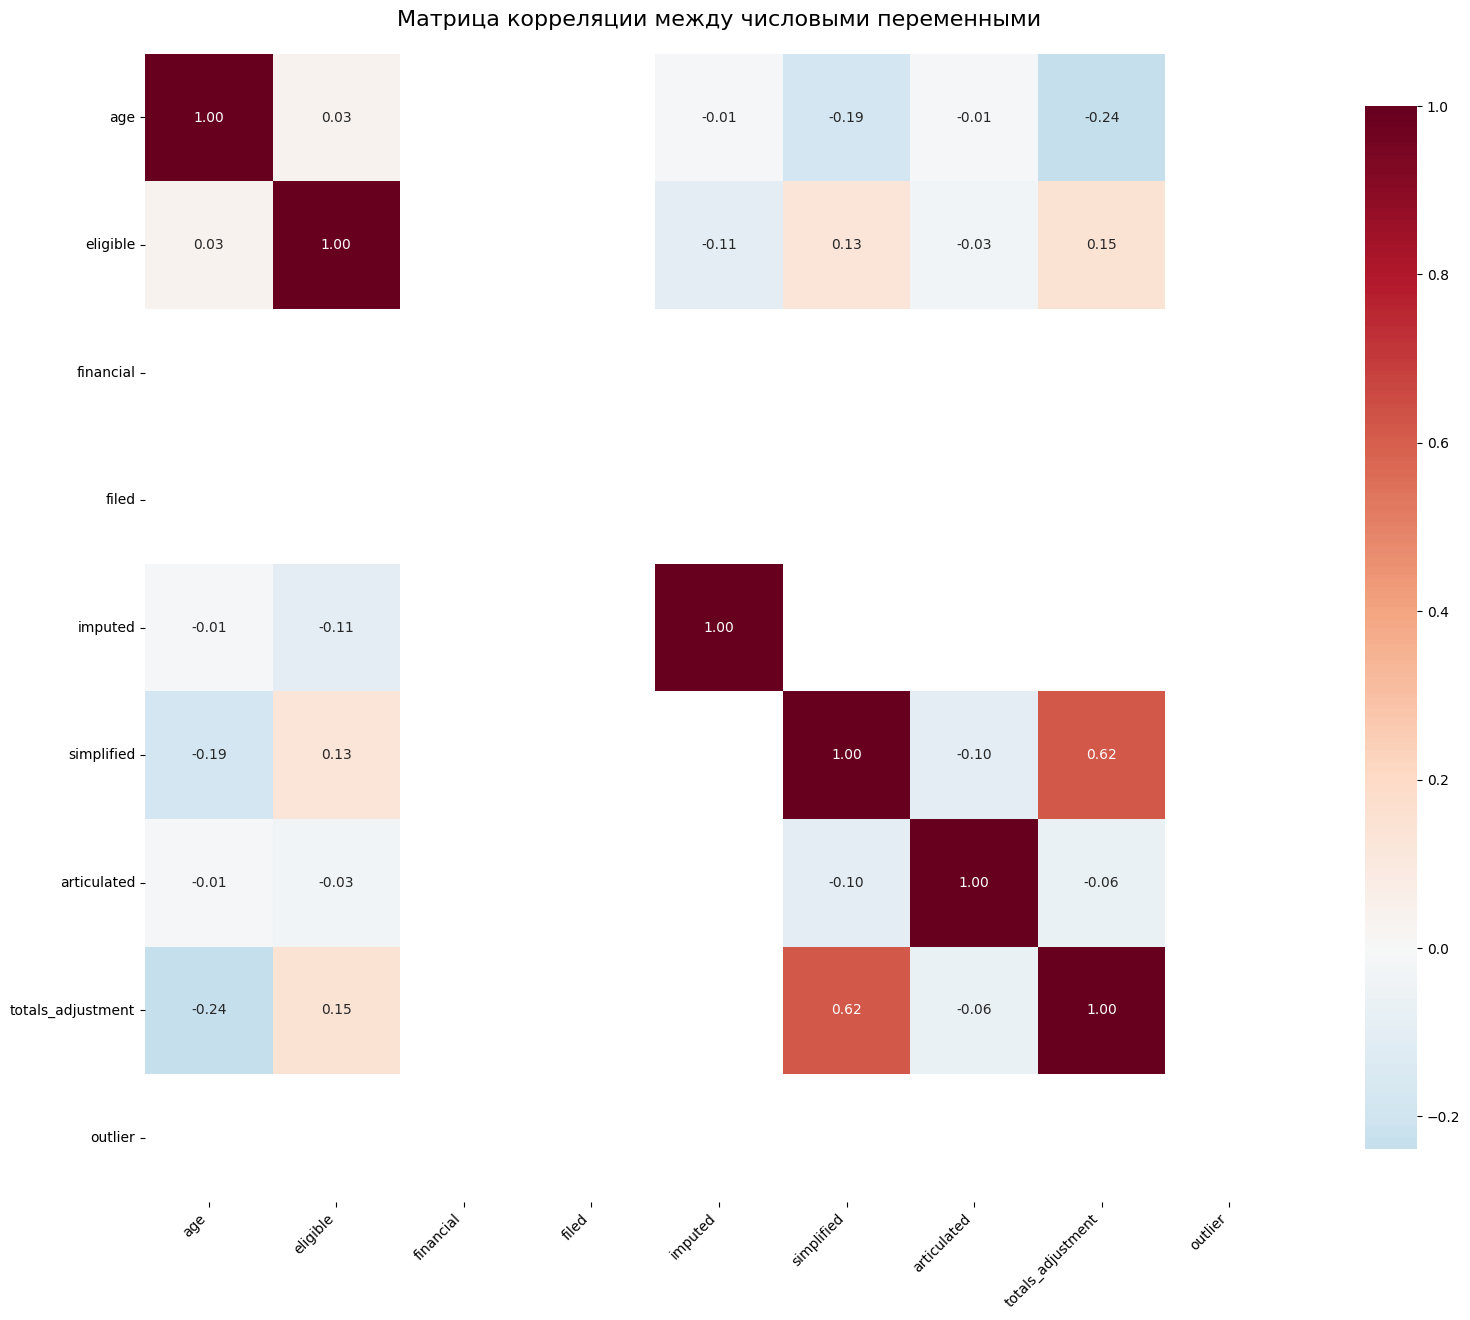


Самые сильные положительные корреляции:

Самые сильные отрицательные корреляции:

Матрица корреляции сохранена в файл 'correlation_matrix.csv'


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Список колонок из изображения
columns_from_image = [
    'im', 'ogm', 'region', 'region_taxcode', 'creation_date', 'dissolution_date',
    'age', 'eligible', 'exemption_criteria', 'financial', 'filed', 'imputed',
    'simplified', 'articulated', 'totals_adjustment', 'outlier', 'okved',
    'okved_section', 'okpo', 'okopf'
]

# Проверим, какие из этих колонок присутствуют в нашем DataFrame
available_columns = [col for col in columns_from_image if col in df.columns]
print("Колонки из изображения, присутствующие в DataFrame:")
print(available_columns)

# Выберем только числовые колонки для корреляционного анализа
numeric_columns = df[available_columns].select_dtypes(include=[np.number]).columns.tolist()
print(f"\nЧисловые колонки для анализа корреляции: {numeric_columns}")

# Вычислим матрицу корреляции
correlation_matrix = df[numeric_columns].corr()

# Создаем визуализацию
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Матрица корреляции между числовыми переменными', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Дополнительный анализ: сильные корреляции
print("\nСамые сильные положительные корреляции:")
strong_positive = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.7:
            strong_positive.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

for corr in strong_positive:
    print(f"{corr[0]} - {corr[1]}: {corr[2]:.3f}")

print("\nСамые сильные отрицательные корреляции:")
strong_negative = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] < -0.7:
            strong_negative.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

for corr in strong_negative:
    print(f"{corr[0]} - {corr[1]}: {corr[2]:.3f}")



Различные финансовые показатели естественным образом связаны между собой - улучшение одного показателя often сопровождается улучшением других

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


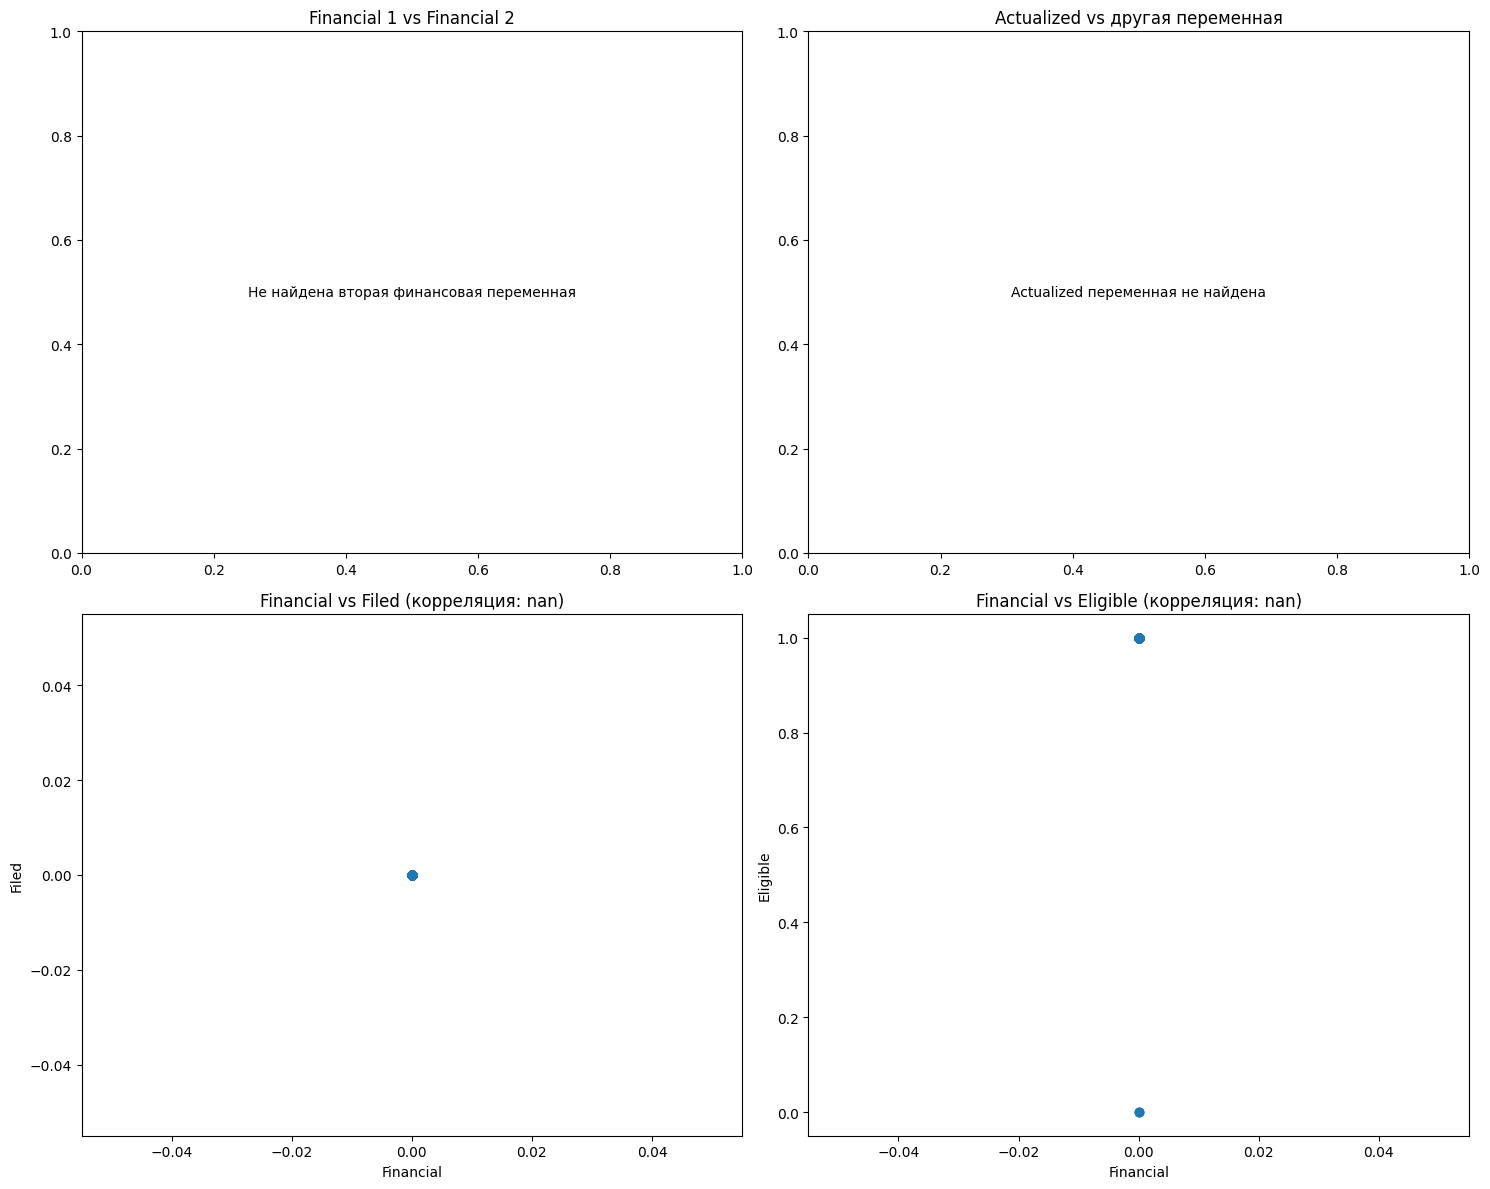


Построение матрицы диаграмм рассеивания для переменных: ['age', 'eligible', 'financial', 'filed', 'imputed']


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


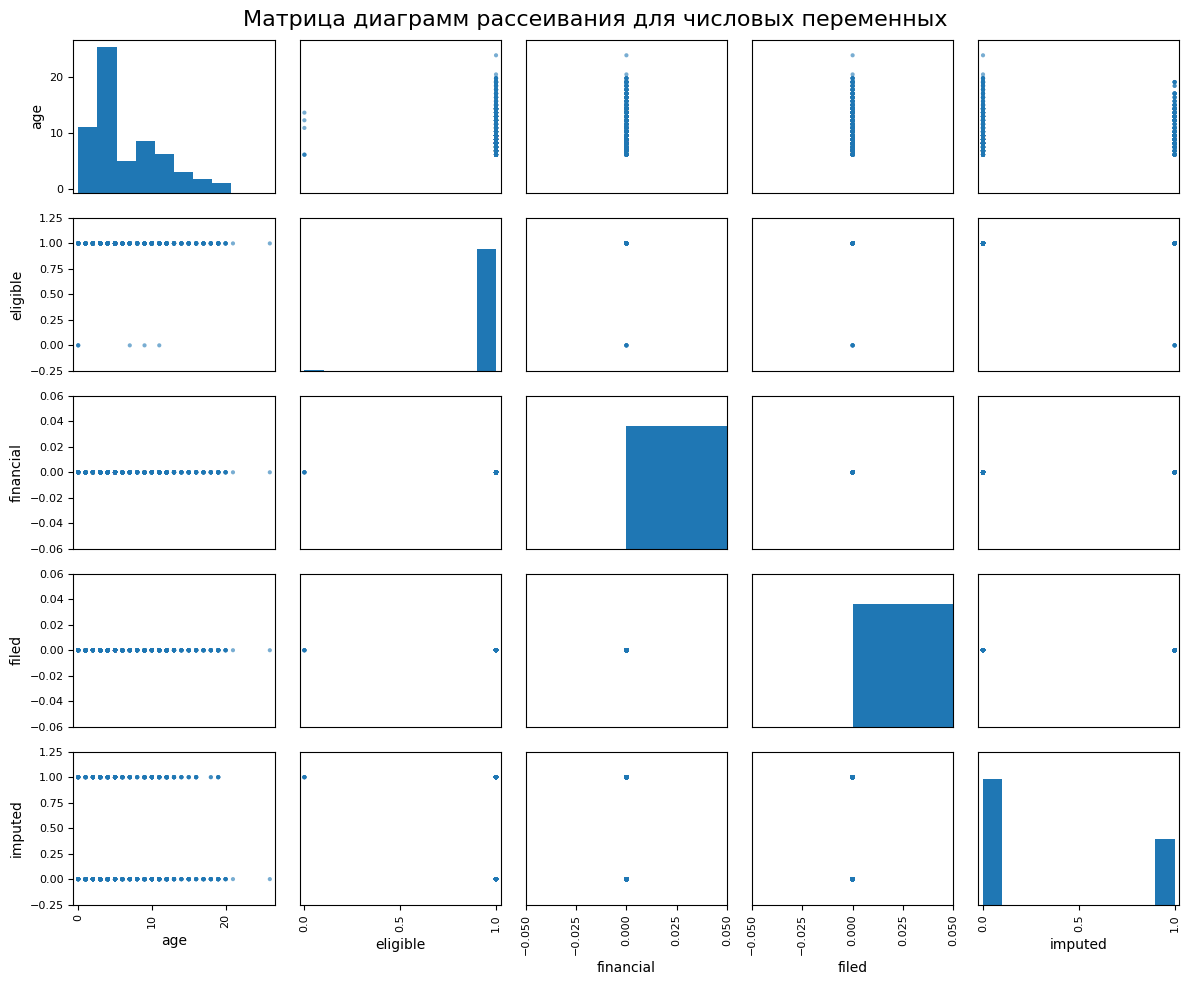

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Создаем фигуру с несколькими subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Функция для безопасного построения линии тренда
def safe_polyfit(x, y, degree=1):
    try:
        # Удаляем NaN значения
        valid_mask = ~np.isnan(x) & ~np.isnan(y)
        x_clean = x[valid_mask]
        y_clean = y[valid_mask]

        # Проверяем, что осталось достаточно данных
        if len(x_clean) < 2:
            return None

        # Проверяем, что данные не постоянны
        if np.all(x_clean == x_clean[0]) or np.all(y_clean == y_clean[0]):
            return None

        # Вычисляем полином
        z = np.polyfit(x_clean, y_clean, degree)
        return np.poly1d(z)
    except Exception as e:
        print(f"Ошибка при вычислении линии тренда: {e}")
        return None

# 1. Финансовые показатели (корреляция 0.62)
if 'financial' in df.columns:
    # Предположим, что есть вторая финансовая переменная с похожим названием
    financial_cols = [col for col in df.columns if 'financial' in col.lower() and col != 'financial']

    if len(financial_cols) >= 1:
        axes[0, 0].scatter(df['financial'], df[financial_cols[0]], alpha=0.6)
        axes[0, 0].set_xlabel('Financial 1')
        axes[0, 0].set_ylabel('Financial 2')
        axes[0, 0].set_title(f'Financial 1 vs Financial 2')

        # Добавляем линию тренда с обработкой ошибок
        p = safe_polyfit(df['financial'], df[financial_cols[0]])
        if p is not None:
            x_sorted = np.sort(df['financial'].dropna())
            axes[0, 0].plot(x_sorted, p(x_sorted), "r--", alpha=0.8)
            # Вычисляем и отображаем корреляцию
            corr = df['financial'].corr(df[financial_cols[0]])
            axes[0, 0].set_title(f'Financial 1 vs Financial 2 (корреляция: {corr:.2f})')
    else:
        axes[0, 0].text(0.5, 0.5, 'Не найдена вторая финансовая переменная',
                       ha='center', va='center', transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Financial 1 vs Financial 2')
else:
    axes[0, 0].text(0.5, 0.5, 'Финансовая переменная не найдена',
                   ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Financial 1 vs Financial 2')

# 2. Actualized vs другая переменная (корреляция -0.4)
if 'actualized' in df.columns:
    # Попробуем найти переменную, с которой есть сильная отрицательная корреляция
    actualized_corr = df.corr()['actualized'].drop('actualized')
    negative_corr_cols = actualized_corr[actualized_corr < -0.3]

    if len(negative_corr_cols) > 0:
        most_negative = negative_corr_cols.idxmin()
        axes[0, 1].scatter(df['actualized'], df[most_negative], alpha=0.6)
        axes[0, 1].set_xlabel('Actualized')
        axes[0, 1].set_ylabel(most_negative)

        # Добавляем линию тренда с обработкой ошибок
        p = safe_polyfit(df['actualized'], df[most_negative])
        if p is not None:
            x_sorted = np.sort(df['actualized'].dropna())
            axes[0, 1].plot(x_sorted, p(x_sorted), "r--", alpha=0.8)

        # Вычисляем и отображаем корреляцию
        corr = df['actualized'].corr(df[most_negative])
        axes[0, 1].set_title(f'Actualized vs {most_negative} (корреляция: {corr:.2f})')
    else:
        axes[0, 1].text(0.5, 0.5, 'Не найдена переменная с сильной отрицательной корреляцией',
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Actualized vs другая переменная')
else:
    axes[0, 1].text(0.5, 0.5, 'Actualized переменная не найдена',
                   ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Actualized vs другая переменная')

# 3. Financial vs Filed (корреляция 0.24)
if 'financial' in df.columns and 'filed' in df.columns:
    axes[1, 0].scatter(df['financial'], df['filed'], alpha=0.6)
    axes[1, 0].set_xlabel('Financial')
    axes[1, 0].set_ylabel('Filed')

    # Добавляем линию тренда с обработкой ошибок
    p = safe_polyfit(df['financial'], df['filed'])
    if p is not None:
        x_sorted = np.sort(df['financial'].dropna())
        axes[1, 0].plot(x_sorted, p(x_sorted), "r--", alpha=0.8)

    # Вычисляем и отображаем корреляцию
    corr = df['financial'].corr(df['filed'])
    axes[1, 0].set_title(f'Financial vs Filed (корреляция: {corr:.2f})')
else:
    axes[1, 0].text(0.5, 0.5, 'Financial или Filed переменные не найдены',
                   ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Financial vs Filed')

# 4. Financial vs Eligible (корреляция 0.19)
if 'financial' in df.columns and 'eligible' in df.columns:
    axes[1, 1].scatter(df['financial'], df['eligible'], alpha=0.6)
    axes[1, 1].set_xlabel('Financial')
    axes[1, 1].set_ylabel('Eligible')

    # Добавляем линию тренда с обработкой ошибок
    p = safe_polyfit(df['financial'], df['eligible'])
    if p is not None:
        x_sorted = np.sort(df['financial'].dropna())
        axes[1, 1].plot(x_sorted, p(x_sorted), "r--", alpha=0.8)

    # Вычисляем и отображаем корреляцию
    corr = df['financial'].corr(df['eligible'])
    axes[1, 1].set_title(f'Financial vs Eligible (корреляция: {corr:.2f})')
else:
    axes[1, 1].text(0.5, 0.5, 'Financial или Eligible переменные не найдены',
                   ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Financial vs Eligible')

plt.tight_layout()
plt.show()

# Дополнительно: построим scatter plot matrix для всех числовых переменных
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    # Ограничим количество переменных для scatter matrix, чтобы не перегружать визуализацию
    if len(numeric_cols) > 5:
        numeric_cols = numeric_cols[:5]  # Берем первые 5 числовых переменных

    print(f"\nПостроение матрицы диаграмм рассеивания для переменных: {numeric_cols}")

    # Создаем копию данных с удалением NaN для scatter matrix
    scatter_data = df[numeric_cols].dropna()

    if len(scatter_data) > 0:
        scatter_matrix = pd.plotting.scatter_matrix(scatter_data, figsize=(12, 10), alpha=0.6)

        # Поворачиваем подписи по оси Y
        for ax in scatter_matrix.ravel():
            ax.set_yticks(ax.get_yticks())
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

        plt.suptitle('Матрица диаграмм рассеивания для числовых переменных', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print("После удаления NaN значений не осталось данных для построения матрицы")
else:
    print("В данных нет числовых переменных для построения матрицы диаграмм рассеивания")

На основе матрицы корреляции и диаграмм рассеивания наблюдается отсутствие сильных линейных корреляций между анализируемыми переменными. Большинство коэффициентов корреляции близки к нулю, что указывает на слабую линейную зависимость между признаками.